In [ ]:
#Linear Regression with Gradient Descent from Scratch
"""
    * Author: Byamasu Patrick Paul
    * Date: 21st July, 2020
    * University of Livingstonia
    * Computer Engineering
    * Africa Deep AI Circle
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
""" Generating some fake data """
true_slope = 10.889
true_intercept = 3.456
input_var = np.arange(0.0, 100.00)
output_var = true_slope * input_var + true_intercept + 500.0 * np.random.rand(len(input_var))

<IPython.core.display.Javascript object>


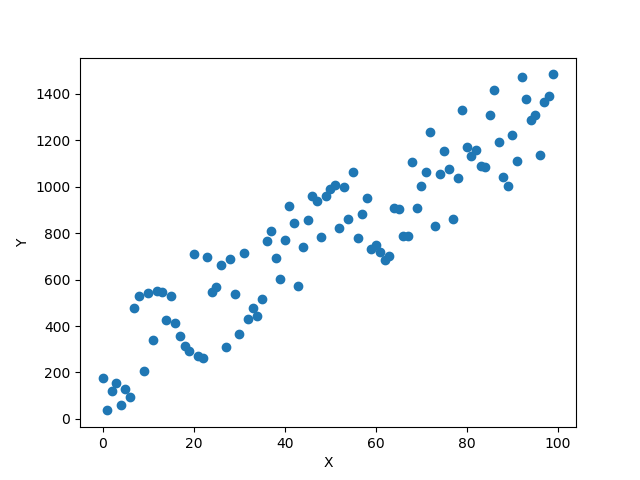

In [62]:
%matplotlib notebook
"""We first plot the data in order to visualize the distributution of the data"""
plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [12]:
# Let compute the cost function
def compute_cost(input_var, output_var, params):
    """Here we are computing the linear regression cost function"""
    cost_sum = 0.0
    num_samples = len(output_var)
    #print(num_sample)
    for x,y in zip(input_var, output_var):
        y_hat = np.dot(params, np.array([1.0, x]))
        cost_sum += (y_hat - y)**2
        
    cost = cost_sum / (num_samples * 2.0 )
    
    return cost

In [63]:
def lin_regr_batch_gradient_descent(input_var, output_var, params, alpha, max_iter):
    """Let compute the parameters of the linear regression model"""
    iteration = 0
    num_samples = len(input_var)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    while iteration < max_iter:        
        cost[iteration] = compute_cost(input_var, output_var, params)
        params_store[:, iteration] = params
        #print(params)        
        print("------------------------------------------")
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        #Create a second loop where we have to loop over the entire training set
        for x,y in zip(input_var, output_var):
            y_hat = np.dot(params, np.array([1.0, x]))
            gradient = np.array([1.0, x]) * (y - y_hat)
            params += alpha * gradient/num_samples
                
        iteration += 1
    
    return params, cost, params_store

In [64]:
"""Train the model"""
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size = 0.20)
params_0 = np.array([20.0, 80.0])
#print(params_0)
alpha = 1e-3
max_iter = 500
# print(x_train)
params_hat_batch, cost_batch, params_store_batch = \
    lin_regr_batch_gradient_descent(x_train, y_train, params_0, alpha, max_iter)

------------------------------------------
iteration: 0
cost: 6999838.748939602
------------------------------------------
iteration: 1
cost: 21706.464316883044
------------------------------------------
iteration: 2
cost: 15069.072673781819
------------------------------------------
iteration: 3
cost: 15107.05346108111
------------------------------------------
iteration: 4
cost: 15106.314540768488
------------------------------------------
iteration: 5
cost: 15103.955514848829
------------------------------------------
iteration: 6
cost: 15101.542324666725
------------------------------------------
iteration: 7
cost: 15099.128509322214
------------------------------------------
iteration: 8
cost: 15096.715887034215
------------------------------------------
iteration: 9
cost: 15094.30451892551
------------------------------------------
iteration: 10
cost: 15091.8944064393
------------------------------------------
iteration: 11
cost: 15089.485548992097
-------------------------------

------------------------------------------
iteration: 144
cost: 14780.033229322991
------------------------------------------
iteration: 145
cost: 14777.786762976717
------------------------------------------
iteration: 146
cost: 14775.54146634597
------------------------------------------
iteration: 147
cost: 14773.297338820887
------------------------------------------
iteration: 148
cost: 14771.05437979187
------------------------------------------
iteration: 149
cost: 14768.812588649711
------------------------------------------
iteration: 150
cost: 14766.571964785446
------------------------------------------
iteration: 151
cost: 14764.332507590501
------------------------------------------
iteration: 152
cost: 14762.09421645655
------------------------------------------
iteration: 153
cost: 14759.857090775633
------------------------------------------
iteration: 154
cost: 14757.621129940113
------------------------------------------
iteration: 155
cost: 14755.386333342618
-------

------------------------------------------
iteration: 282
cost: 14480.821376831722
------------------------------------------
iteration: 283
cost: 14478.730700011565
------------------------------------------
iteration: 284
cost: 14476.64111168134
------------------------------------------
iteration: 285
cost: 14474.552611273535
------------------------------------------
iteration: 286
cost: 14472.465198220942
------------------------------------------
iteration: 287
cost: 14470.37887195666
------------------------------------------
iteration: 288
cost: 14468.293631914052
------------------------------------------
iteration: 289
cost: 14466.209477526829
------------------------------------------
iteration: 290
cost: 14464.126408228942
------------------------------------------
iteration: 291
cost: 14462.04442345468
------------------------------------------
iteration: 292
cost: 14459.963522638593
------------------------------------------
iteration: 293
cost: 14457.883705215543
-------

------------------------------------------
iteration: 433
cost: 14177.143187811685
------------------------------------------
iteration: 434
cost: 14175.210609372636
------------------------------------------
iteration: 435
cost: 14173.279036998472
------------------------------------------
iteration: 436
cost: 14171.348470164692
------------------------------------------
iteration: 437
cost: 14169.418908347052
------------------------------------------
iteration: 438
cost: 14167.490351021625
------------------------------------------
iteration: 439
cost: 14165.562797664708
------------------------------------------
iteration: 440
cost: 14163.636247752915
------------------------------------------
iteration: 441
cost: 14161.710700763098
------------------------------------------
iteration: 442
cost: 14159.786156172404
------------------------------------------
iteration: 443
cost: 14157.862613458256
------------------------------------------
iteration: 444
cost: 14155.940072098305
----

In [65]:
#Let implement the stochastic gradient descent
def lin_reg_stoch_gradient_descent(input_var, output_var, params, alpha):
    """Compute the params for linear regression using stochastic gradient descent"""
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    iteration = 0
    for x,y in zip(input_var, output_var):
        cost[iteration] = compute_cost(input_var, output_var, params)
        params_store[:, iteration] = params
        print("------------------------------------------")
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        #Create a second loop where we have 
        y_hat = np.dot(params, np.array([1.0, x]))
        gradient = np.array([1.0, x]) * (y - y_hat)
        params += alpha * gradient/num_samples

        iteration += 1
            
    return params, cost, params_store

In [66]:
alpha = 1e-3
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store =\
    lin_reg_stoch_gradient_descent(x_train, y_train, params_0, alpha)

------------------------------------------
iteration: 0
cost: 6999838.748939602
------------------------------------------
iteration: 1
cost: 6364082.642205121
------------------------------------------
iteration: 2
cost: 5472364.517718776
------------------------------------------
iteration: 3
cost: 5175627.37101637
------------------------------------------
iteration: 4
cost: 5175501.785117814
------------------------------------------
iteration: 5
cost: 5148384.436830657
------------------------------------------
iteration: 6
cost: 4313368.700537299
------------------------------------------
iteration: 7
cost: 4102086.051756043
------------------------------------------
iteration: 8
cost: 3300218.1668867967
------------------------------------------
iteration: 9
cost: 3298917.494645656
------------------------------------------
iteration: 10
cost: 2804017.6175715653
------------------------------------------
iteration: 11
cost: 2730342.868657117
-------------------------------------

<IPython.core.display.Javascript object>


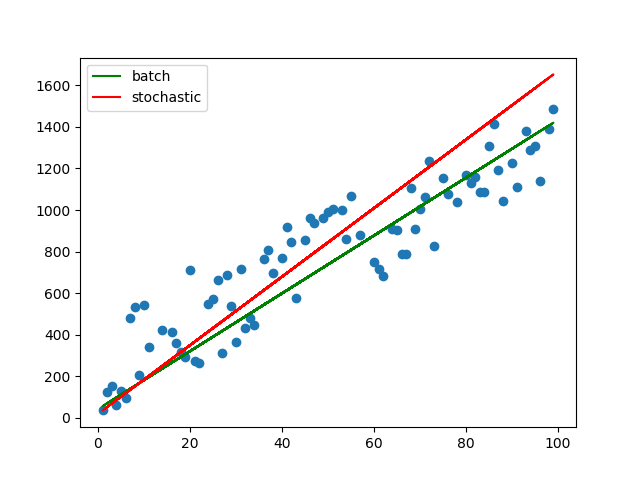

In [67]:
#Let plot the figure to see the way the model feed to the trained dataset
plt.figure()
plt.scatter(x_train, y_train)
plt.plot(x_train, params_hat_batch[0] + params_hat_batch[1] * x_train, 'g', label='batch')
plt.plot(x_train, params_hat[0] + params_hat[1] * x_train, '-r', label='stochastic')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


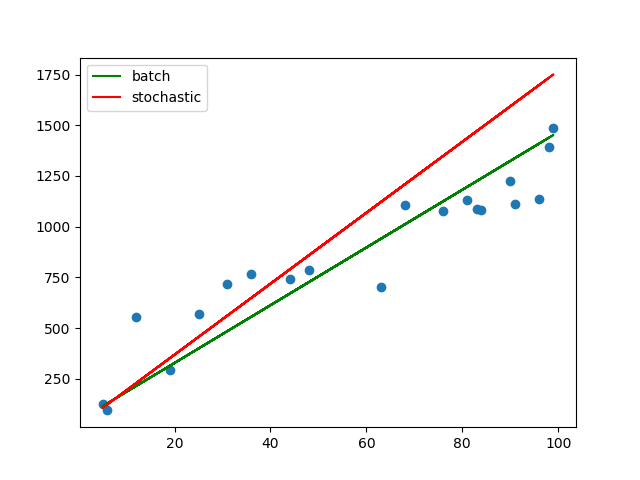

batch T0,T1: 43.59901414247122, 14.229593566822471
batch T0,T1: 19.060030856445007, 17.493129895893503
batch rms: 158.9949186073361
stochastic rms: 293.06951028273573


In [53]:
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, params_hat_batch[0] + params_hat_batch[1] * x_test, 'g', label='batch')
plt.plot(x_test, params_hat[0] + params_hat[1] * x_test, '-r', label='stochastic')
plt.legend()
plt.show()
print(f'batch T0,T1: {params_hat_batch[0]}, {params_hat_batch[1]}')
print(f'batch T0,T1: {params_hat[0]}, {params_hat[1]}')
rms_batch = np.sqrt(np.mean(np.square(params_hat_batch[0] + params_hat_batch[1] * x_test - y_test)))
rms_stochastic = np.sqrt(np.mean(np.square(params_hat[0] + params_hat[1] * x_test - y_test)))
print(f'batch rms: {rms_batch}')
print(f'stochastic rms: {rms_stochastic}')

<IPython.core.display.Javascript object>


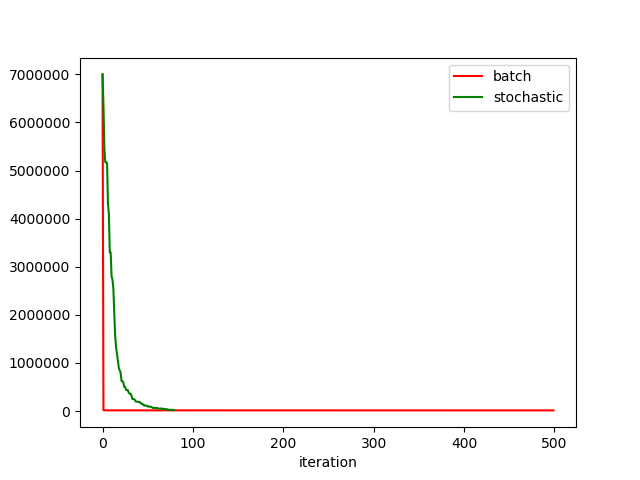

min cost with BGD: 14051.727214841536
min cost with SGD: 21232.680896495192


In [68]:
plt.figure()
plt.plot(np.arange(max_iter), cost_batch, 'r', label='batch')
plt.plot(np.arange(len(cost)), cost, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized cost')
plt.legend()
plt.show()
print(f'min cost with BGD: {np.min(cost_batch)}')
print(f'min cost with SGD: {np.min(cost)}')